In [13]:
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
API_URL = "https://developer.nrel.gov/api/alt-fuel-stations/v1.csv"
API_PARAMS = {'api_key': 'EUe0n9InavfhKtKtmscW1Emd5b3IhaJwOkcHu3MN', 'fuel_type': 'ELEC'}
RAW_FILE = "./data/NREL_All_Stations_data.csv"

In [226]:
def get_data(url, params, save_path):
    r = requests.get(url, params=params)
    print('Status Code: ', r.status_code)
    decoded_content = r.content.decode('utf-8')
    reader = csv.reader(decoded_content.splitlines(), delimiter=',')
    with open(save_path, 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        for row in reader:
            writer.writerow(row)
    print('Data saved to: ', save_path)

In [227]:
# get_data(API_URL, API_PARAMS, RAW_FILE)

In [15]:
raw_data = pd.read_csv(RAW_FILE, delimiter='\t')

/tmp/ipykernel_4828/3471019757.py:1: DtypeWarning: Columns (6,20,31,46,69,73) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(RAW_FILE, delimiter='\t')


In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67622 entries, 0 to 67621
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           67622 non-null  object 
 1   Station Name                             67621 non-null  object 
 2   Street Address                           67589 non-null  object 
 3   Intersection Directions                  2538 non-null   object 
 4   City                                     67618 non-null  object 
 5   State                                    67610 non-null  object 
 6   ZIP                                      67622 non-null  object 
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            63968 non-null  object 
 9   Status Code                              67622 non-null  object 
 10  Expected Date                            4390 

In [229]:
accepted_params = [
    'Station Name', 'Street Address',
    'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
    'Station Phone', 'Status Code', 'Expected Date',
    'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
    'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
    'EV Other Info', 'EV Network',
    'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
    'Date Last Confirmed', 'Updated At', 'Owner Type Code',
    'Federal Agency ID', 'Federal Agency Name', 'Open Date',
    'EV Connector Types', 'Access Code', 'Access Detail Code',
    'Federal Agency Code', 'Facility Type', 
    'EV Pricing', 'EV On-Site Renewable Source', 'Restricted Access',
    'NPS Unit Name', 'Maximum Vehicle Class', 'EV Workplace Charging'
    ]
raw_data = raw_data[accepted_params]
raw_data.to_csv('./data/NREL_All_Stations_data_selected.csv', index=False, sep='\t')

In [230]:
core_params = [
    'Station Name', 'Street Address', 'State', 'Status Code', 'Expected Date',
    'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
    'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
    'EV Other Info', 'EV Network',
    'EV Network Web', 'Latitude', 'Longitude',
    'Date Last Confirmed', 'Owner Type Code', 'Open Date',
    'EV Connector Types', 'Access Code', 'Access Detail Code', 'Facility Type', 
    'EV Pricing', 'EV On-Site Renewable Source', 'Restricted Access',
    'NPS Unit Name', 'Maximum Vehicle Class', 'EV Workplace Charging'
    ]
raw_data = raw_data[core_params]
raw_data.to_csv('./data/NREL_All_Stations_data_si618.csv', index=False, sep='\t')

In [39]:
test_params = [
    'Station Name', 'Street Address', 'Status Code', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
    'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 
    'EV Network', 'EV Network Web', 'Latitude', 'Longitude',
    'Owner Type Code', 'Open Date',
    'EV Connector Types', 'Facility Type', 
    'EV Pricing', 'Restricted Access',
    'Maximum Vehicle Class', 'EV Workplace Charging'
    ]
raw_data = raw_data[test_params]

In [40]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67622 entries, 0 to 67621
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Station Name             67621 non-null  object 
 1   Street Address           67589 non-null  object 
 2   Status Code              67622 non-null  object 
 3   Groups With Access Code  67622 non-null  object 
 4   Access Days Time         60507 non-null  object 
 5   Cards Accepted           5357 non-null   object 
 6   EV Level1 EVSE Num       727 non-null    float64
 7   EV Level2 EVSE Num       59253 non-null  float64
 8   EV DC Fast Count         9238 non-null   float64
 9   EV Network               67619 non-null  object 
 10  EV Network Web           58176 non-null  object 
 11  Latitude                 67622 non-null  float64
 12  Longitude                67622 non-null  float64
 13  Owner Type Code          18236 non-null  object 
 14  Open Date             

In [41]:
raw_data['EV Pricing'].value_counts()

EV Pricing
Free                                                         9889
FREE                                                          924
$2.00/Hr Parking Fee                                          224
Pricing unknown                                               223
$1.00/Hr Parking Fee                                          125
                                                             ... 
$2 initiation fee + $0.14 per kW                                1
Free for first 3 hours, $10 per hour afterward                  1
Paid through InCharge                                           1
$1 session fee and $0.25 per kWh; $0.01 per hour idle fee       1
$0.39 per kWh; free for internal use                            1
Name: count, Length: 761, dtype: int64

In [232]:
raw_data.shape

(67622, 21)

In [17]:
raw_data.Latitude = raw_data.Latitude.astype(float)
raw_data.Longitude = raw_data.Longitude.astype(float)

<Axes: xlabel='State', ylabel='count'>

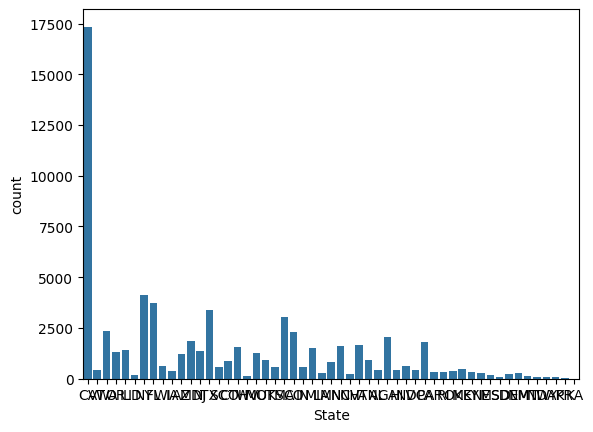

In [23]:
sns.countplot(x='State', data=raw_data, orient='v')

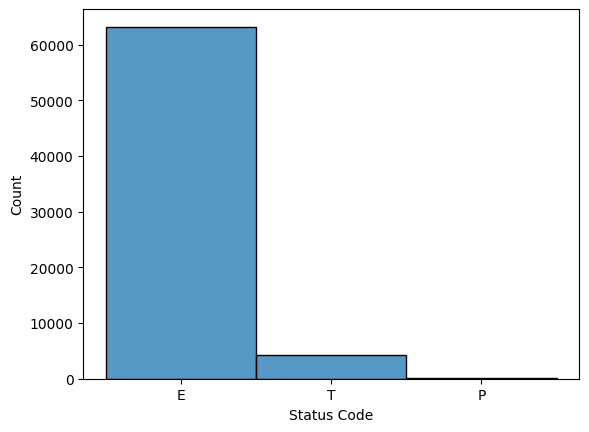

In [27]:
hist = sns.histplot(data=raw_data, x='Status Code')

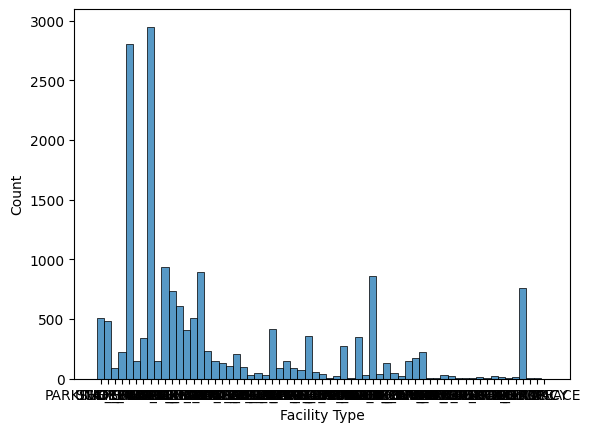

In [28]:
hist = sns.histplot(data=raw_data, x='Facility Type')

<Axes: xlabel='EV Workplace Charging', ylabel='count'>

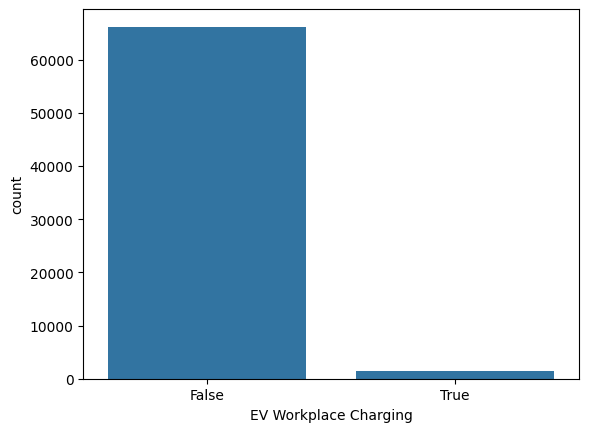

In [30]:
sns.countplot(x='EV Workplace Charging', data=raw_data, orient='v')

<Axes: xlabel='EV DC Fast Count', ylabel='Count'>

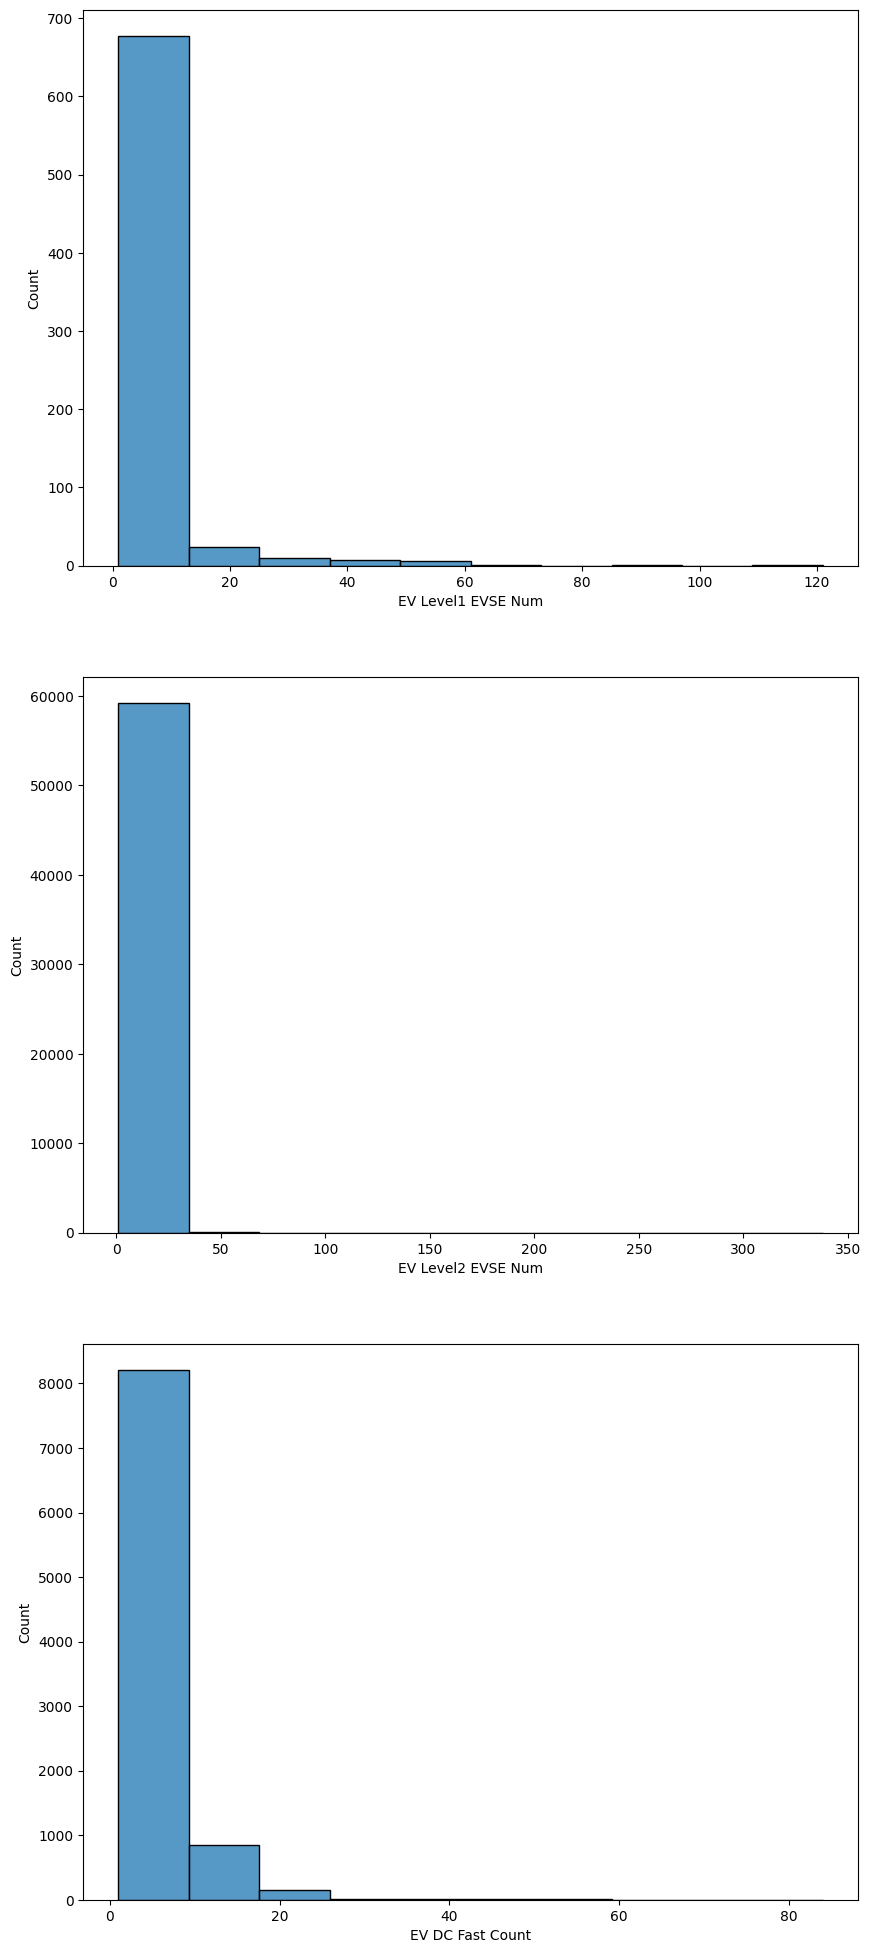

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(top=2)

sns.histplot(data=raw_data, x='EV Level1 EVSE Num', bins=10, ax=ax[0])
sns.histplot(data=raw_data, x='EV Level2 EVSE Num', bins=10, ax=ax[1])
sns.histplot(data=raw_data, x='EV DC Fast Count', bins=10, ax=ax[2])

In [234]:
raw_data.head()

,Station Name,Street Address,Status Code,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,...,Latitude,Longitude,Owner Type Code,Open Date,EV Connector Types,Facility Type,EV Pricing,Restricted Access,Maximum Vehicle Class,EV Workplace Charging
0,LADWP - Truesdale Center,11797 Truesdale St,E,Private,Fleet use only,NaN,NaN,57.0,2.0,SHELL_RECHARGE,...,34.248319,-118.387971,LG,1999-10-15,CHADEMO J1772 J1772COMBO,UTILITY,NaN,NaN,NaN,True
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,E,Private,NaN,NaN,NaN,4.0,NaN,Non-Networked,...,34.052542,-118.448504,LG,2020-02-28,J1772,UTILITY,Free,NaN,NaN,True
2,Los Angeles Convention Center,1201 S Figueroa St,E,Public,5:30am-9pm; pay lot,NaN,NaN,7.0,NaN,Non-Networked,...,34.040539,-118.271387,P,1995-08-30,J1772,PARKING_GARAGE,Free; parking fee,False,LD,False
3,LADWP - John Ferraro Building,111 N Hope St,E,Private,For fleet and employee use only,NaN,NaN,338.0,12.0,Non-Networked,...,34.059133,-118.248589,LG,1999-10-15,CHADEMO J1772 J1772COMBO,UTILITY,NaN,NaN,LD,True
4,LADWP - Haynes Power Plant,6801 E 2nd St,E,Private,Fleet use only,NaN,NaN,19.0,1.0,Non-Networked,...,33.759802,-118.096665,LG,2018-05-01,CHADEMO J1772 J1772COMBO,UTILITY,NaN,NaN,NaN,True


In [235]:
raw_data.to_csv('./data/NREL_All_Stations_data_si650.csv', index=False, sep='\t')

In [236]:
google_data = pd.read_csv('./data/Google_Map_review_data.csv')

In [237]:
google_data.lat = google_data.lat.astype(float)
google_data.lng = google_data.lng.astype(float)

In [238]:
mask = (abs(raw_data.Latitude - google_data.lat[0]) < 0.001) & (abs(raw_data.Longitude - google_data.lng[0]) < 0.001)

In [243]:
selected = raw_data[mask]
selected

,Station Name,Street Address,Status Code,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,...,Latitude,Longitude,Owner Type Code,Open Date,EV Connector Types,Facility Type,EV Pricing,Restricted Access,Maximum Vehicle Class,EV Workplace Charging
11784,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,E,Public,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,...,43.59142,-116.28359,NaN,2019-04-26,CHADEMO J1772COMBO,NaN,NaN,NaN,NaN,False


In [239]:
google_data.head()

,name,business_status,address,lat,lng,types,rating,user_ratings_total,#charging_stations,text,author_name,author_url,relative_time_description,time,Unnamed: 14
0,Electrify America Charging Station,OPERATIONAL,"8300 W Overland Rd, Boise, ID 83709, USA",43.59165,-116.283556,"point_of_interest, establishment",5,9,5,Electric Vehicle Charging\ngood location in Wa...,Anmar Abdullah,https://www.google.com/maps/contrib/1149397606...,7 months ago,2022-09-25 21:33:44,0
1,Electrify America Charging Station,OPERATIONAL,"8300 W Overland Rd, Boise, ID 83709, USA",43.59165,-116.283556,"point_of_interest, establishment",4,9,5,The rates seem a little high and I often find ...,Space Ghost,https://www.google.com/maps/contrib/1005346496...,4 months ago,2023-01-06 2:41:54,0
2,Electrify America Charging Station,OPERATIONAL,"8300 W Overland Rd, Boise, ID 83709, USA",43.59165,-116.283556,"point_of_interest, establishment",1,9,5,Tried 3 different chargers . Still couldn’t ge...,Roxanna Todd,https://www.google.com/maps/contrib/1171099222...,4 months ago,2022-12-18 23:50:11,0
3,Electrify America Charging Station,OPERATIONAL,"8300 W Overland Rd, Boise, ID 83709, USA",43.59165,-116.283556,"point_of_interest, establishment",3,9,5,There's always at least one charger not workin...,Andy Jensen,https://www.google.com/maps/contrib/1112728836...,7 months ago,2022-10-12 22:01:23,0
4,Electrify America Charging Station,OPERATIONAL,"8300 W Overland Rd, Boise, ID 83709, USA",43.59165,-116.283556,"point_of_interest, establishment",2,9,5,Frustrating as hell! Most of them require a 2...,John Hudson,https://www.google.com/maps/contrib/1025132783...,9 months ago,2022-07-24 2:35:54,0


In [240]:
raw_data_available = raw_data[raw_data['Status Code'] == 'E']
raw_data_planned = raw_data[raw_data['Status Code'] == 'P']

In [241]:
drop_list_available = ['Status Code', 'Expected Date']
raw_data_available.drop(drop_list_available, axis=1, inplace=True)

KeyError: "['Expected Date'] not found in axis"

In [ ]:
drop_list_planned = ['Status Code', 'Expected Date']
raw_data_planned.drop(drop_list_planned, axis=1, inplace=True)

/tmp/ipykernel_35555/3271262598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_planned.drop(drop_list_planned, axis=1, inplace=True)


In [ ]:
raw_data_available.head()

,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Latitude,...,EV Connector Types,Access Code,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
0,Private,Fleet use only,NaN,NaN,57.0,2.0,NaN,SHELL_RECHARGE,https://shellrecharge.com/en-us/solutions,34.248319,...,CHADEMO J1772 J1772COMBO,private,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,True
1,Private,NaN,NaN,NaN,4.0,NaN,NaN,Non-Networked,NaN,34.052542,...,J1772,private,NaN,UTILITY,Free,NaN,NaN,NaN,NaN,True
2,Public,5:30am-9pm; pay lot,NaN,NaN,7.0,NaN,NaN,Non-Networked,NaN,34.040539,...,J1772,public,NaN,PARKING_GARAGE,Free; parking fee,NaN,False,NaN,LD,False
3,Private,For fleet and employee use only,NaN,NaN,338.0,12.0,NaN,Non-Networked,NaN,34.059133,...,CHADEMO J1772 J1772COMBO,private,NaN,UTILITY,NaN,NaN,NaN,NaN,LD,True
4,Private,Fleet use only,NaN,NaN,19.0,1.0,NaN,Non-Networked,NaN,33.759802,...,CHADEMO J1772 J1772COMBO,private,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,True
